### 008 DataMaker

This is a notebook to make a data sets for the 008 relationship plots for the tutorial and the in-class exercise. It makes:

#### two related numeric variables

* linear relationship for tutorial
* non-linear " " "
* linear for exercise
* non-lin for exercise

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data for tutorial

Specity whatever filenames you want:

In [75]:
fname1 = "008TutorialDataFile1.csv" # linear, linear x
fname2 = "008TutorialDataFile2.csv" # correlated, Gaussian x
fname3 = "008TutorialDataFile3.csv" # x^2 term, linear x

### Make some linearly related data.

Define size of data.

In [76]:
n = 100 # number of observations
nv = 2  # number of variables
xmin = 0 # minimum x value
xmax = 100

#### Make the numerical data (i.e. the measurements).

##### First the x axis. 
It turns out that np.linspace() and np.arange() produce "vectors" **not** 1xn or nx1 arrays. **And** you cannot then concatenate or multiply it with an array; numpy won't coerce it into having a second dimension like MATLAB does. You have to explicitly add the dimension of length one. This took me over two agonizing and frustating hours to work out.

In [77]:
x = np.linspace(xmin, xmax, n)
x = x[:, np.newaxis] # makes a [n,1] array from a dimensionless vector

##### Now the y values

In [78]:
m = 4.2
b = 5
noysAmp = 10
noys = noysAmp*np.random.randn(n, 1)
y = b + m*x + noys 

##### Concatenate into nx2 ndarray

In [79]:
myData = np.hstack((x,y))
np.shape(myData)

(100, 2)

##### Convert the numpy array into a pandas data frame:

<AxesSubplot:xlabel='X', ylabel='Y'>

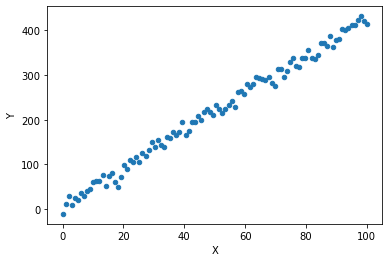

In [80]:
myDataFr = pd.DataFrame(myData, columns=["X", "Y"])
myDataFr.plot(x="X", y="Y", kind="scatter")

Save the data frame to a .csv (comma separated values) file:

In [81]:
myDataFr.to_csv(fname1, index=False)

### Make some correlated data

Define size of data.

In [82]:
n = 100 # number of observations
nv = 2  # number of variables

#### Make the numerical data (i.e. the measurements).

##### First the x axis. 


In [83]:
xOff = 5
xScl = 1
x = xOff + xScl*np.random.randn(n, 1)

##### Now the y values

In [84]:
yOff = 5
yScl = 1
xyr = 0.42
y = yOff + yScl*np.random.randn(n, 1)
y = (1-xyr)*np.random.randn(n, 1) + (xyr)*x 

##### Concatenate into nx2 ndarray

In [85]:
myData = np.hstack((x,y))
np.shape(myData)

(100, 2)

##### Convert the numpy array into a pandas data frame:

<AxesSubplot:xlabel='X', ylabel='Y'>

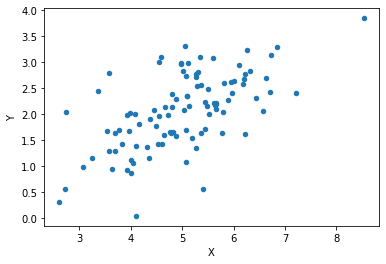

In [86]:
myDataFr = pd.DataFrame(myData, columns=["X", "Y"])
myDataFr.plot(x="X", y="Y", kind="scatter")

Save the data frame to a .csv (comma separated values) file:

In [87]:
myDataFr.to_csv(fname2, index=False)

### Nonlinear data

Define size of data.

In [88]:
n = 200 # number of observations
nv = 2  # number of variables
xmin = 0.1 # minimum x value
xmax = 42

#### Make the numerical data (i.e. the measurements).

##### First the x axis. 
It turns out that np.linspace() and np.arange() produce "vectors" **not** 1xn or nx1 arrays. **And** you cannot then concatenate or multiply it with an array; numpy won't coerce it into having a second dimension like MATLAB does. You have to explicitly add the dimension of length one. This took me over two agonizing and frustating hours to work out.

In [89]:
x = np.linspace(xmin, xmax, n)
x = x[:, np.newaxis] # makes a [n,1] array from a dimensionless vector

##### Now the y values

In [90]:
# params
a, b, c = 10, 0, 0.7
# noise
noysAmp = 100
noys = noysAmp*np.random.randn(n, 1)
# y
y = a + b*x + c*(x**2) + noys 

##### Concatenate into nx2 ndarray

In [91]:
myData = np.hstack((x,y))
np.shape(myData)

(200, 2)

##### Convert the numpy array into a pandas data frame:

<AxesSubplot:xlabel='X', ylabel='Y'>

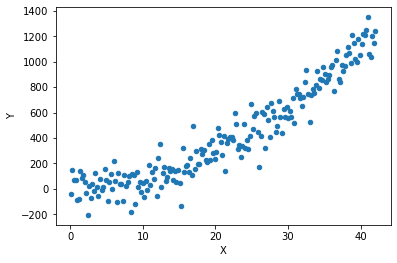

In [92]:
myDataFr = pd.DataFrame(myData, columns=["X", "Y"])
myDataFr.plot(x="X", y="Y", kind="scatter")

Save the data frame to a .csv (comma separated values) file:

In [93]:
myDataFr.to_csv(fname3, index=False)

#### Data for in-class exercise